In [11]:
from math import exp, log, sin, cos
import numpy as np
import matplotlib.pyplot as plt

In [12]:
x0 = 0
x1 = 3
y0 = 1.5
rtol = 1e-6
atol = 1e-10

In [13]:
# Правая часть
def f_mean(x: float, y: float):
    return -2 * (y - cos(3*x))

In [14]:
# Точное решение
def f_solution(x: float):
    return 4/13 * cos(3*x) + 6/13 * sin(3*x) + 31/26 * exp(-2*x)

y_true = f_solution(x1)

print(y_true)

-0.0871838059499877


In [15]:
num_dot = 50
teta = [1/num_dot * (i+1) for i in range(num_dot)]
B = [[2/3*i**3 - 3/2 * i**2 + i, i**2-2*(2/3*i**3 - 1/2 * i**2), 2/3*i**3 - 1/2 * i**2] for i in teta] 
B_new = [[i- 5/6 * i**2, 4/6*i**2, 1/6 * i**2] for i in teta] #другое решение системы, более точный метод

In [16]:
def y_find(x: float, h: float, y: float, B): #метод Симпсона
    K1 = f_mean(x, y)
    K2 = f_mean(x+h/2, y+h*K1/2)
    K3 = f_mean(x+h, y+h*(-K1 + 2*K2))
    y1 = y+h*(B[-1][0]*K1 + B[-1][1]*K2 + B[-1][2]*K3)
    return(y1, K1, K2, K3)

In [17]:
def fix_step(x0, y0, h, B):
    x = [x0]
    y = [y0]
    K_1 = []
    x_teta = []
    y_teta = []
    while x[-1]+h<=x1:
        y1, K1, K2, K3 = y_find(x[-1], h, y[-1], B)
        K_1.append(K1)
        x_teta+=[x[-1]+h*i for i in teta]
        y_teta+=[y[-1]+h*(i[0]*K1 + i[1]*K2 + i[2]*K3) for i in B]
        x.append(x[-1]+h)
        y.append(y1)
    if(x[-1]!=x1):
        y1, K1, K2, K3 = y_find(x[-1], x1-x[-1], y[-1], B)
        K_1.append(K1)
        x_teta+=[x[-1]+(x1-x[-1])*i for i in teta]
        y_teta+=[y[-1]+(x1-x[-1])*(i[0]*K1 + i[1]*K2 + i[2]*K3) for i in B]
        x.append(x1)
        y.append(y1)
    K_1.append(f_mean(x[-1], y[-1]))
    return(x, y, x_teta, y_teta, K_1)

[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
[1.5, 0.9223524899025575, -0.05514959342885084, -0.49203436626134134, 0.13157945153009742, 0.5593295328206233, -0.03622195888547464]


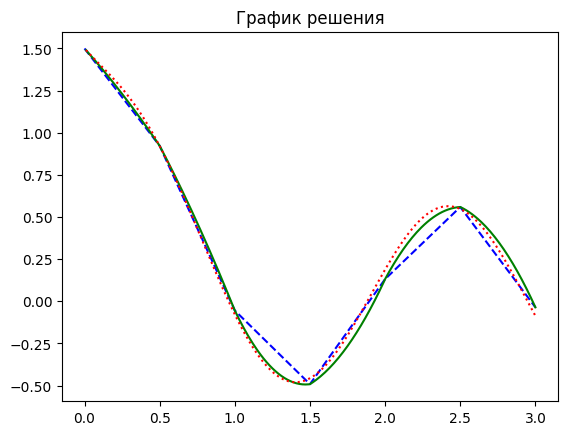

In [18]:
xRK, yRK, xTeta, yTeta, K = fix_step(x0, y0, 0.5, B_new)
fig, axs1 = plt.subplots()
axs1.plot(xRK, yRK, 'b', linestyle='--') #решение методом Симпсона
axs1.plot(xTeta, yTeta, 'g') #непрерывный метод
axs1.plot(xTeta, [f_solution(i) for i in xTeta], 'r', linestyle=':') #точное решение
axs1.set_title('График решения')
print(xRK)
print(yRK)

Text(0.5, 1.0, 'График решения')

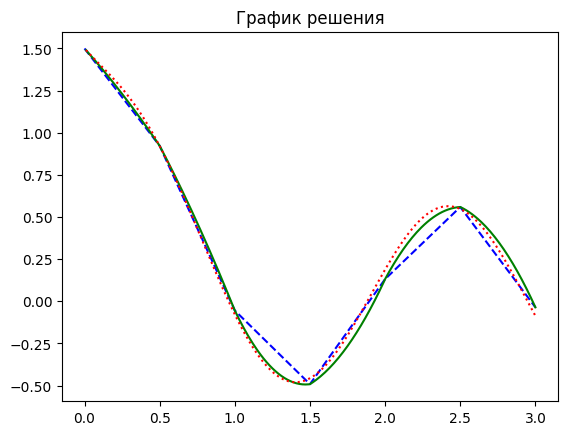

In [19]:
xRK_new, yRK_new, xTeta_new, yTeta_new, K_new = fix_step(x0, y0, 0.5, B_new)
fig, axs1 = plt.subplots()
axs1.plot(xRK_new, yRK_new, 'b', linestyle='--')#решение методом Симпсона
axs1.plot(xTeta_new, yTeta_new, 'g') #непрерывный метод
axs1.plot(xTeta_new, [f_solution(i) for i in xTeta_new], 'r', linestyle=':') #точное решение
axs1.set_title('График решения')

Text(0.5, 1.0, 'График решения')

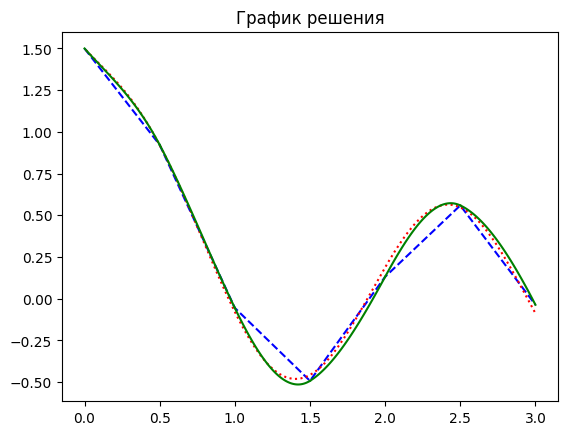

In [20]:
h=0.5
fig, axs1 = plt.subplots()
axs1.plot(xRK_new, yRK_new, 'b', linestyle='--')#решение методом Симпсона
axs1.plot(xTeta_new, [f_solution(i) for i in xTeta_new], 'r', linestyle=':') #точное решение
for i in range(1,7):#Эрмитовы сплайны третьего порядка
    a0=yRK_new[i-1]
    a1=K_new[i-1]
    a2=(3*yRK_new[i]-3*yRK_new[i-1]-2*h*K_new[i-1]-h*K_new[i])/(h*h)
    a3=(2*yRK_new[i-1]-2*yRK_new[i]+h*K_new[i-1]+h*K_new[i])/(h*h*h)
    x = np.linspace(h*(i-1),h*i,100)
    y = a0+a1*(x-xRK_new[i-1])+a2*(x-xRK_new[i-1])**2+a3*(x-xRK_new[i-1])**3
    axs1.plot(x, y, 'g') 
axs1.set_title('График решения')